<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa5_uw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




In [108]:
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X_train, X_val, y_train, y_val = train_test_split(data.data, data.target, random_state=0)
model = Ridge().fit(X_train, y_train)
perm_test = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)
print(perm_test.importances_mean)
print(type(data.data))
klasa=data.target
zm_x = data.data
data = pd.DataFrame(zm_x, columns=data.feature_names)
data["target"] = klasa
data = pd.DataFrame(data)

# zostawiamy najmniej istotne zmienne, żeby lepiej zobrazować działanie svm z ustawionym jądrem (normalnie byśmy zostawili najistotniejsze zmienne)
iris=pd.DataFrame(data).iloc[:,[0,1,4]]
iris = iris.loc[iris["target"] >0 ]

print(iris.head())
iris


[ 0.05035219 -0.00123606  0.75316559  0.3615811 ]
<class 'numpy.ndarray'>
    sepal length (cm)  sepal width (cm)  target
50                7.0               3.2       1
51                6.4               3.2       1
52                6.9               3.1       1
53                5.5               2.3       1
54                6.5               2.8       1


,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [109]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
clf.fit(iris.iloc[:,:-1], iris.iloc[:,-1])
x_min, x_max = iris.iloc[:, 0].min() - 1, iris.iloc[:, 0].max() + 1
y_min, y_max = iris.iloc[:, 1].min() - 1, iris.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision=decision.reshape(xx.shape)
print(decision)



[[-4.31758778 -4.30463207 -4.29164385 ...  0.95996549  0.98258139
   1.00522982]
 [-4.30750914 -4.2944854  -4.28142913 ...  0.99025227  1.01293621
   1.03565268]
 [-4.29750362 -4.28441184 -4.27128753 ...  1.02046593  1.04321792
   1.06600243]
 ...
 [-4.53824398 -4.50508014 -4.47188377 ...  6.74112763  6.78395168
   6.82680825]
 [-4.54988164 -4.51664975 -4.48338534 ...  6.74969812  6.7925902
   6.83551481]
 [-4.56159241 -4.52829249 -4.49496003 ...  6.75819548  6.80115561
   6.84414826]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<ipython-input-110-b348f814b6df>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


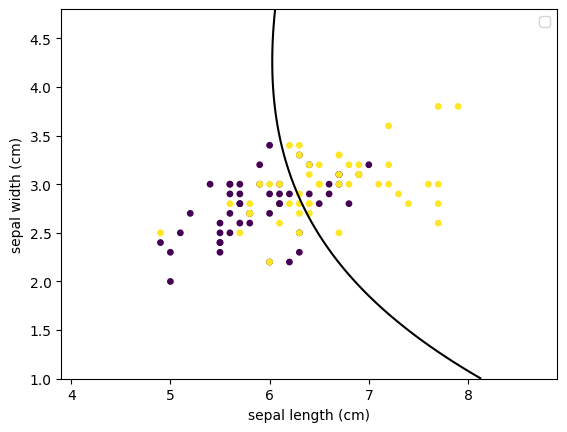

In [110]:
fig = plt.figure()
ax = fig.add_subplot()
xs = iris.iloc[:,0]
ys = iris.iloc[:,1]
m = iris.iloc[:,2]
size = [15 for i in range(len(xs))]

ax.scatter(xs, ys, c=m, s=size)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.contour(xx, yy, decision, levels=[0], colors='black')
ax.legend()
plt.show()

     x1_squared  sqrt(2)x1x2  x2_squared
50        49.00    31.678384       10.24
51        40.96    28.963094       10.24
52        47.61    30.250028        9.61
53        30.25    17.889802        5.29
54        42.25    25.738687        7.84
..          ...          ...         ...
145       44.89    28.425693        9.00
146       39.69    22.273864        6.25
147       42.25    27.577164        9.00
148       38.44    29.811622       11.56
149       34.81    25.031580        9.00

[100 rows x 3 columns]
     x1_squared  sqrt(2)x1x2  x2_squared  target
50        49.00    31.678384       10.24       1
51        40.96    28.963094       10.24       1
52        47.61    30.250028        9.61       1
53        30.25    17.889802        5.29       1
54        42.25    25.738687        7.84       1
..          ...          ...         ...     ...
145       44.89    28.425693        9.00       2
146       39.69    22.273864        6.25       2
147       42.25    27.577164        9.00   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


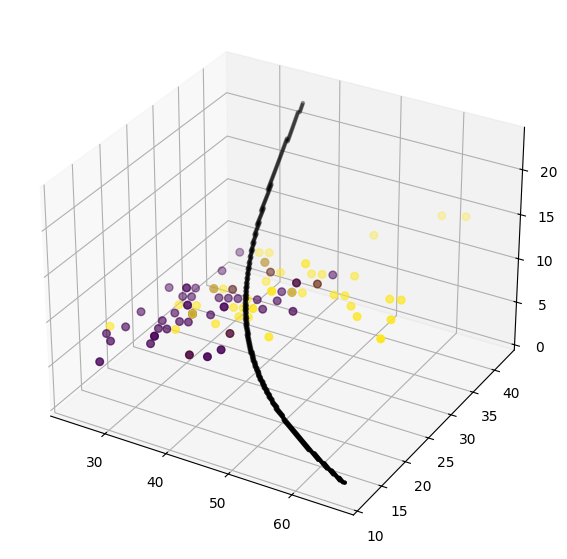

In [111]:
fig = plt.figure(figsize=(10, 7))
ax2 = fig.add_subplot(projection='3d')

phi_x_iris = pd.DataFrame({"x1_squared" : iris["sepal length (cm)"]**2, "sqrt(2)x1x2":np.sqrt(2)*iris['sepal length (cm)']*iris['sepal width (cm)'], "x2_squared":iris['sepal width (cm)']**2})
print(phi_x_iris)
new_iris = pd.concat([phi_x_iris, iris.iloc[:,-1]], axis=1)
print(new_iris)

sizer = [30 for i in range(len(new_iris.iloc[:,0]))]
ax2.scatter(new_iris.iloc[:,0], new_iris.iloc[:,1], new_iris.iloc[:,2], c=iris.iloc[:,-1], s=sizer)

phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.02)
ax2.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')


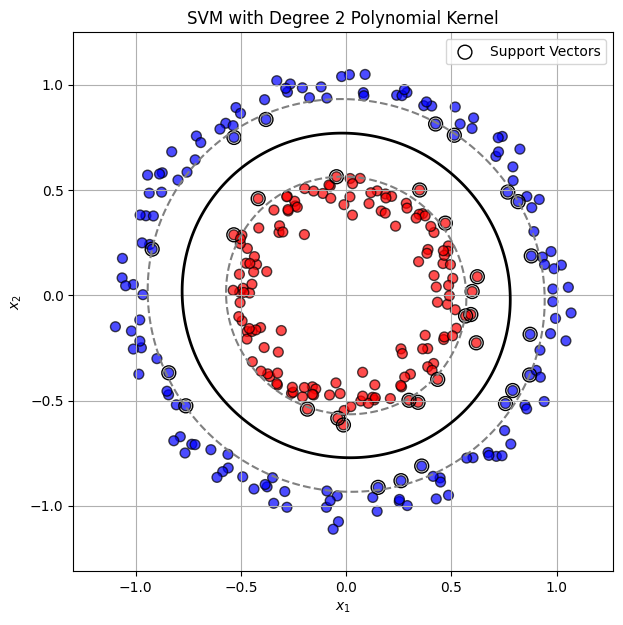

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()
